In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
%matplotlib inline
def confusion_matrix_heatmap(cm: np.ndarray, fsize:int=1, fmt:str=",",
                             cmap=None) -> plt.Figure:
  sns.set(font_scale=fsize)
  fig, ax = plt.subplots(figsize=(5,5))
  ConfusionMatrixDisplay(cm).plot(values_format=fmt, cmap=cmap, ax=ax)
  ax.grid(False)
  return fig

# Problem 1 (20 points) - Logistic Regression
In the example given in class, using the Iris dataset, we predicted the species using only the petal length and width.  Repeat the study adding the sepal width and length (in addition to the petal width and length) as predictors.  Does classification accuracy improve with the additional predictors?

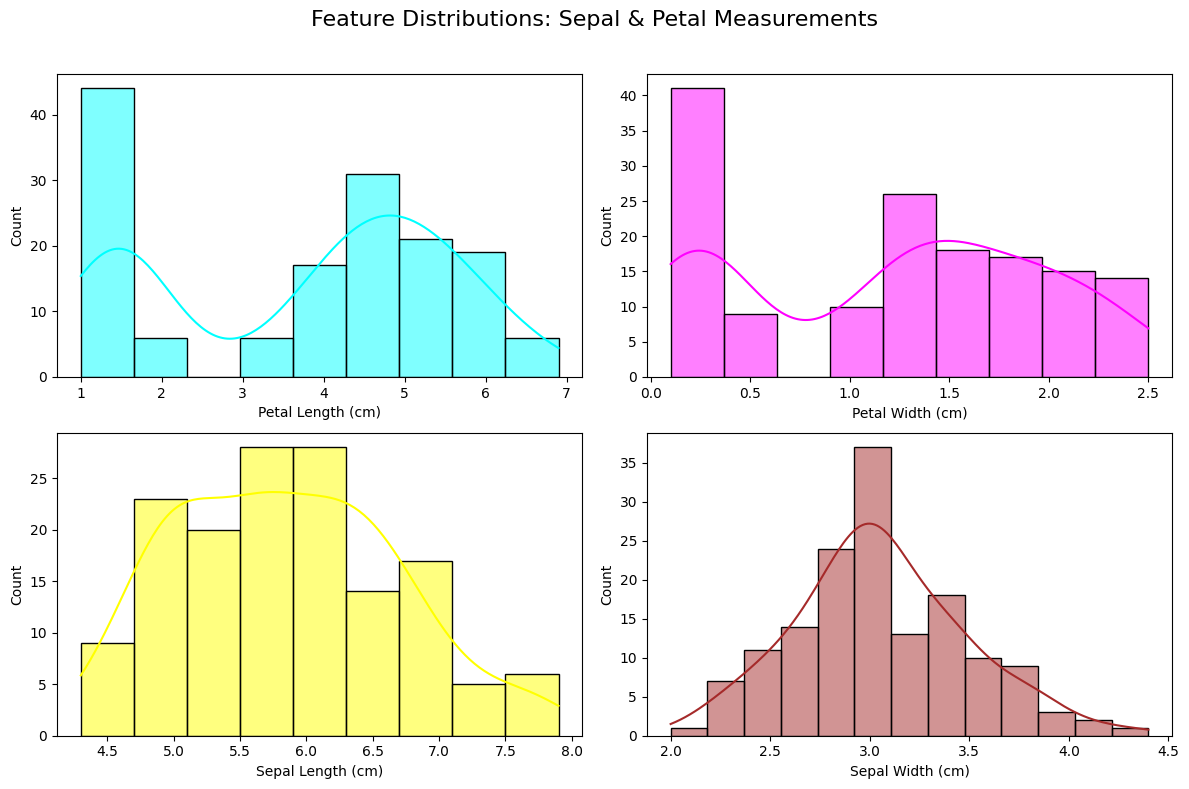

Performance Report (Petal Features):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



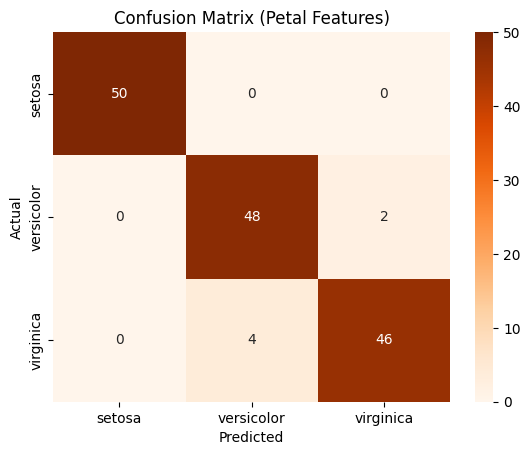

Performance Report (Sepal Features):
              precision    recall  f1-score   support

      setosa       1.00      0.98      0.99        50
  versicolor       0.73      0.76      0.75        50
   virginica       0.76      0.74      0.75        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



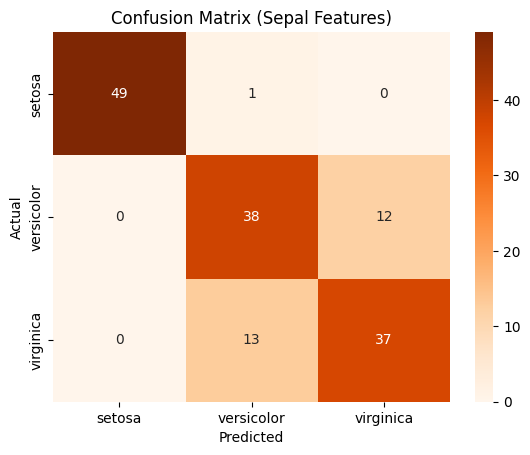

Performance Report (All Features):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



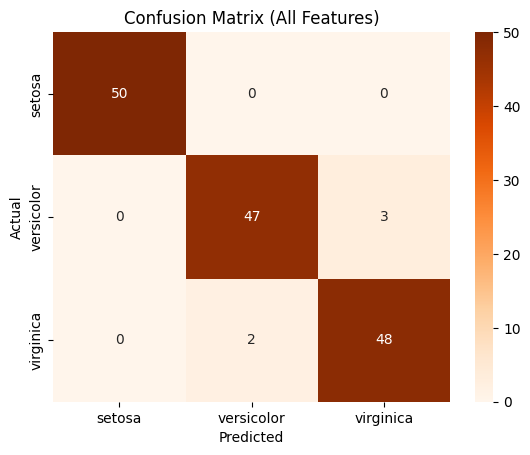

Using all features slightly improves classification performance.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def assess_features(data, targets, subset_type, folds=10):
    """
    Function to test classification performance using different feature subsets.
    """
    classifier_pipeline = Pipeline([('scaler', StandardScaler()),
                                    ('classifier', OneVsOneClassifier(LogisticRegression(max_iter=200)))])

    if subset_type == 'Petal':
        selected_data = data[:, 2:4]  # Petal-related characteristics
    elif subset_type == 'Sepal':
        selected_data = data[:, :2]  # Sepal-related traits
    else:
        selected_data = data  # All available data

    predictions = cross_val_predict(classifier_pipeline, selected_data, targets, cv=folds)

    # Output classification report
    print(f"Performance Report ({subset_type} Features):")
    print(classification_report(targets, predictions, target_names=iris_dataset.target_names))

    # Display confusion matrix
    matrix = confusion_matrix(targets, predictions)
    sns.heatmap(matrix, annot=True, cmap="Oranges", fmt="d",
                xticklabels=iris_dataset.target_names, yticklabels=iris_dataset.target_names)
    plt.title(f'Confusion Matrix ({subset_type} Features)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy_score(targets, predictions)

# Load the Iris dataset
iris_dataset = load_iris()
data_features, data_labels = iris_dataset.data, iris_dataset.target

# Plotting feature distributions
fig, axes_arr = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Feature Distributions: Sepal & Petal Measurements', fontsize=16)

sns.histplot(data_features[:, 2], kde=True, ax=axes_arr[0, 0], color="cyan")
axes_arr[0, 0].set_xlabel('Petal Length (cm)')

sns.histplot(data_features[:, 3], kde=True, ax=axes_arr[0, 1], color="magenta")
axes_arr[0, 1].set_xlabel('Petal Width (cm)')

sns.histplot(data_features[:, 0], kde=True, ax=axes_arr[1, 0], color="yellow")
axes_arr[1, 0].set_xlabel('Sepal Length (cm)')

sns.histplot(data_features[:, 1], kde=True, ax=axes_arr[1, 1], color="brown")
axes_arr[1, 1].set_xlabel('Sepal Width (cm)')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Assess different subsets of characteristics
petal_acc = assess_features(data_features, data_labels, 'Petal')
sepal_acc = assess_features(data_features, data_labels, 'Sepal')
overall_acc = assess_features(data_features, data_labels, 'All')

# Compare results
if overall_acc > petal_acc:
    print("Using all features slightly improves classification performance.")
else:
    print("Petal features alone provide sufficient classification accuracy.")

# Problem 2 (30 points) - Gradient Descent

As shown in class, we can obtain the weights for a logistic regression model through gradient descent.  Our objective is to find a weight matrix $\mathbf{w^\star}$ such that $\nabla J(\mathbf{w^\star})\approx0$.  (You can use $\lVert \nabla J(\mathbf w) \rVert < 0.01$ as a reasonable approximation.)  This is the value of $\mathbf{w}$ that best predicts the correct class for training observations.

For a logistic regression model:

$$
\nabla J(\mathbf{w}) = \begin{bmatrix}
   -\sum_i(y^{(i)}-\phi(\mathbf{w}\cdot\mathbf{x}^{(i)}))x_1^{(i)} \\
 \vdots \\
   -\sum_i(y^{(i)}-\phi(\mathbf{w}\cdot\mathbf{x}^{(i)}))x_n^{(i)} \\
 \end{bmatrix}
$$

Recall that $\phi(z)$ is the logistic function, i.e., $\phi(z) = (1+e^{-z})^{-1}$.

In the accompanying template, you are given values of predictors $\mathbf{X}$ and targets $\mathbf{y}\in\{0,1\}$.  The classes are linearly separable.
Using the above formula and a learning rate $\eta=0.1$, apply gradient descent to find a value of $\mathbf{w}$ such that
$\nabla J(\mathbf{w}) \approx \mathbf{0}$ (i.e., values for $\mathbf{w}$ that best separate the classes.) Using the code provided in the template, plot the decision boundary to visually demonstrate that the decision boundary separates the two classes.

In [4]:
# Initialization code
# GIVEN: X, y, phi(z), w
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(50, 2, centers=[(-2,-2),(2,2)], random_state=168)
X = StandardScaler().fit_transform(X)
# add the bias term
X = np.c_[np.ones(len(X)), X]

# Initialize weights to zero
w = np.zeros(X.shape[1])

# Logistic function
phi = lambda z: 1/(1+np.exp(-z))

In [5]:
# Your solution here.
def gradient(X, y, w):
   return -np.dot(X.T, (y - phi(np.dot(X, w))))

def gradient_descent(X, y, w_init, learning_rate=0.1, max_iter=10000, tol=0.01):
   w = w_init
   for i in range(max_iter):
     grad = gradient(X, y, w)
     w -= learning_rate * grad
     if np.linalg.norm(grad) < tol:
         break
   return w

weights = gradient_descent(X, y, w)
weights

array([ 4.56726969, 15.63029041,  5.77164554])

The below code can be used to plot the prediction boundary, where `w` is the weight vector defined in the above block.

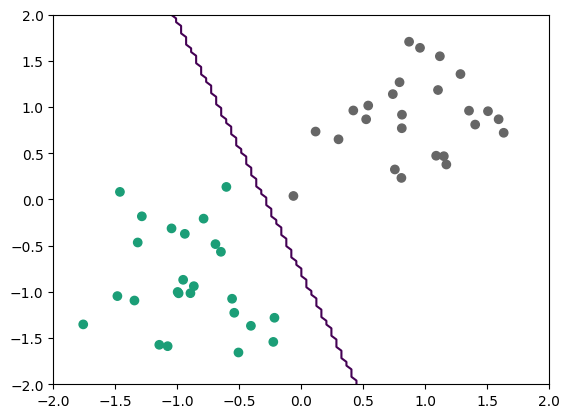

In [6]:
gridsize = 100
gridshape = (gridsize, gridsize)
gridspace = np.linspace(-2, 2, gridsize)
x0m, x1m = np.meshgrid(gridspace, gridspace)
grid = np.c_[np.ones_like(x0m).ravel(), x0m.ravel(), x1m.ravel()]
y_pred = np.apply_along_axis(lambda x: phi(np.dot(w, x)) > 0.5, 1, grid)
plt.contour(x0m.reshape(gridshape),
            x1m.reshape(gridshape),
            y_pred.reshape(gridshape))
plt.scatter(X[:,1], X[:,2], c=y, cmap='Dark2')

# Problem 3 - Binary Classification (50 points)

*Scoring note: parts (a) and (b) are 5 points each, and parts (c) through (f) are 10 points each.*

The OpenML dataset 'credit-g' classifies whether individuals are low credit risks based on 24 predictors [{Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science].

a. Load the 'credit-g' from OpenML and scale the data appropriately.  (A standard scalar will suffice for numeric features.  Categorical feature will need to be one-hot encoded.)

In [7]:
from sklearn.datasets import fetch_openml

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

In [9]:
d = fetch_openml('credit-g', as_frame=True, version=1)
df = d.data
y = (d.target == 'good').astype(int)

run this code block 2nd time.

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Separate numerical and categorical columns
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Standardize numerical data (Using .loc to avoid SettingWithCopyWarning)
scaler = StandardScaler()
df.loc[:, numeric_features] = scaler.fit_transform(df[numeric_features]).astype(float)

# Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_features])

# Create final DataFrame
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
X_final = pd.concat([df[numeric_features].reset_index(drop=True), df_encoded], axis=1)

# Print shape of final dataset
print("Shape of X_final:", X_final.shape)

Shape of X_final: (1000, 7)


b. Split the scaled data into a test and training data set.  Allocate 80\% of records to the training data set.

In [12]:
print("X_final shape:", X_final.shape)
print("y shape:", y.shape)


X_final shape: (1000, 7)
y shape: (1000,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, random_state=42, test_size=0.2, train_size=0.80)


c. Using the training data set, build a logistic regression classifier to predict the credit risk (the target variable in the OpenML dataset).  The regression classifier should use balanced class weights.

In [14]:

from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(class_weight='balanced', random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

d. Still using the training data set, generate a classification report and confusion matrix, and calculate the $F_1$ score.  (Hint: use see [`sklearn.metrics.classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), and [`sklearn.metrics.f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html))

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Predict on training set
y_train_pred = logreg_model.predict(X_train)

# Generate classification report
class_report = classification_report(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred, average='weighted')

# Print results
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score:", f1)

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.59      0.48       241
           1       0.78      0.63      0.70       559

    accuracy                           0.62       800
   macro avg       0.59      0.61      0.59       800
weighted avg       0.67      0.62      0.63       800

Confusion Matrix:
 [[143  98]
 [209 350]]
F1 Score: 0.6310158192818902


e. Still using the training data set, generate and plot the precision-recall curve.

(Hint: see [`sklearn.metrics.precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html).)

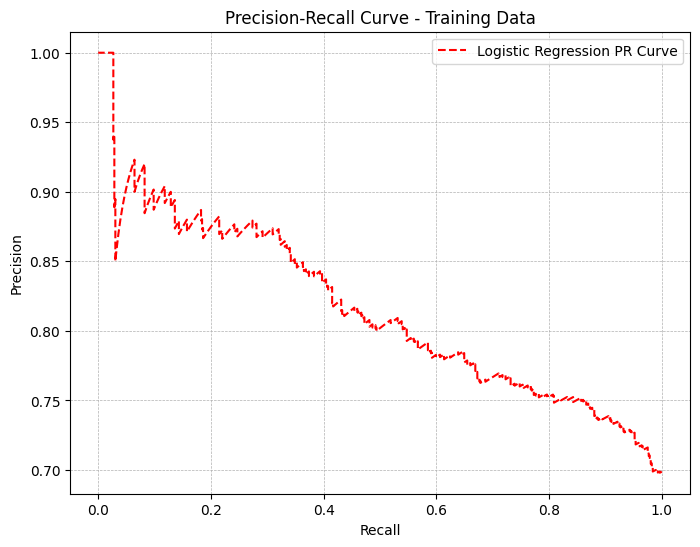

In [16]:
from sklearn.metrics import precision_recall_curve
train_probs = logreg_model.predict_proba(X_train)[:, 1]
# Compute precision-recall values
prec_values, rec_values, _ = precision_recall_curve(y_train, train_probs)

# Alternative Precision-Recall Curve Plot
plt.figure(figsize=(8, 6))
plt.plot(rec_values, prec_values, linestyle='--', color='red', label="Logistic Regression PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Training Data")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

f. Train the model on the complete training data set, and evaluate predictive validity on the test dataset.  Do you obtain a similar $F_1$ score for the test data set.

In [17]:
print(classification_report(y_test,logreg_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.32      0.42      0.36        59
           1       0.72      0.62      0.66       141

    accuracy                           0.56       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.60      0.56      0.58       200



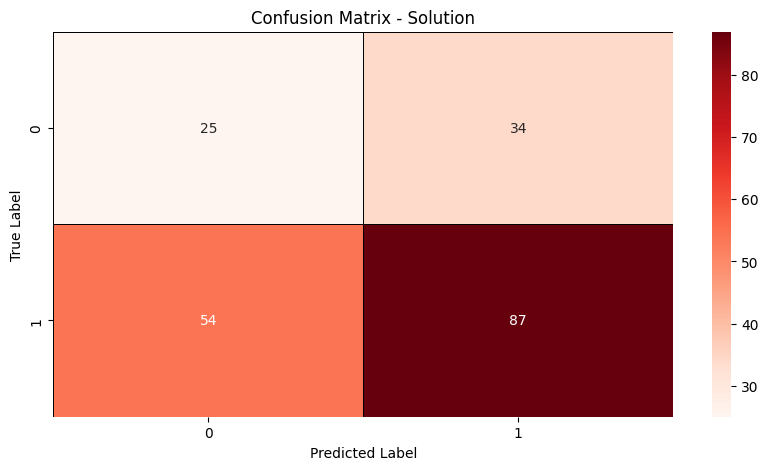

F1 measure on test data (Solution): 0.6641221374045801


In [18]:
# Train another Logistic Regression Model with Different Variable Names
logreg_model_l = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg_model_l.fit(X_train, y_train)

# Make Predictions
test_preds = logreg_model_l.predict(X_test)

# Calculating F1 Score
f1_test = f1_score(y_test, test_preds)

# Plotting a confusion matrix with different styling
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, cmap="Reds", fmt='d', linewidths=0.5, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Solution")
plt.show()

print("F1 measure on test data (Solution):", f1_test)